In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("datasets/shampoo.csv")

In [3]:
raw_data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [40]:
initial_value = raw_data['Sales'][0]

In [4]:
def window(x, n, w):
    window = []
    step_ahead = []
    i = 1
    while i + n + w <= len(x):
        window.append(x[i-1:i+n-1])
        step_ahead.append(x[i+n:i+n+w])
        i += 1
    return window, step_ahead

In [19]:
logdiff_sales_total = np.log(raw_data['Sales']/raw_data['Sales'].shift(1))

In [15]:
logdiff_sales = np.log(raw_data['Sales'][0:24]/raw_data['Sales'][0:24].shift(1))

In [16]:
logdiff_sales[0] = 0

In [17]:
windows, step_ahead = window(logdiff_sales, 5,2)

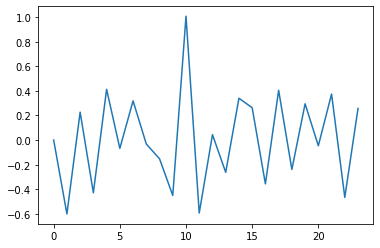

In [18]:
plt.plot(logdiff_sales)

In [20]:
windows = np.array(windows)

In [21]:
windows.shape

(17, 5)

In [22]:
windows_2 = windows.reshape(17,5,1)

In [23]:
step_ahead = np.array(step_ahead)

Epoch 1/350
1/1 [==============================] - 0s 5ms/step - loss: 0.3275
Epoch 2/350
1/1 [==============================] - 0s 10ms/step - loss: 0.3265
Epoch 3/350
1/1 [==============================] - 0s 10ms/step - loss: 0.3258
Epoch 4/350
1/1 [==============================] - 0s 5ms/step - loss: 0.3253
Epoch 5/350
1/1 [==============================] - 0s 5ms/step - loss: 0.3248
Epoch 6/350
1/1 [==============================] - 0s 5ms/step - loss: 0.3244
Epoch 7/350
1/1 [==============================] - 0s 5ms/step - loss: 0.3246
Epoch 8/350
1/1 [==============================] - 0s 8ms/step - loss: 0.3247
Epoch 9/350
1/1 [==============================] - 0s 3ms/step - loss: 0.3247
Epoch 10/350
1/1 [==============================] - 0s 5ms/step - loss: 0.3247
Epoch 11/350
1/1 [==============================] - 0s 8ms/step - loss: 0.3246
Epoch 12/350
1/1 [==============================] - 0s 0s/step - loss: 0.3245
Epoch 13/350
1/1 [==============================] - 0s 10ms/

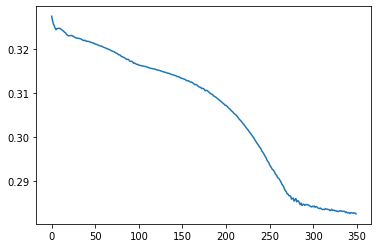

In [148]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(2, input_shape=(5,1)))
#model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(2))
model.compile(loss='mae', optimizer='adam')

history = model.fit(windows_2, step_ahead, epochs = 350, batch_size=32, verbose=1, shuffle=False)
plt.plot(history.history['loss'])

In [27]:
model.predict(logdiff_sales[-5:].values.reshape(1,5,1))

array([[-0.22915828,  0.1512657 ]], dtype=float32)

In [29]:
logdiff_sales_total[0] = 0

In [33]:
logdiff_sales_total[24:26]

24   -0.007625
25    0.259621
Name: Sales, dtype: float64

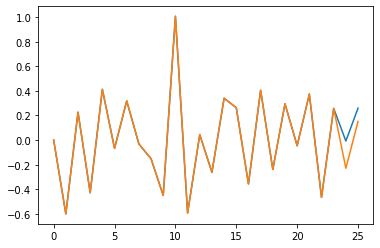

In [37]:
plt.plot(logdiff_sales_total[:26])
plt.plot(list(logdiff_sales) + list(model.predict(logdiff_sales[-5:].values.reshape(1,5,1))[0]))

In [48]:
predito = np.array(list(logdiff_sales) + list(model.predict(logdiff_sales[-5:].values.reshape(1,5,1))[0]))

In [49]:
predito = np.exp(predito)

In [50]:
predito[0] = initial_value

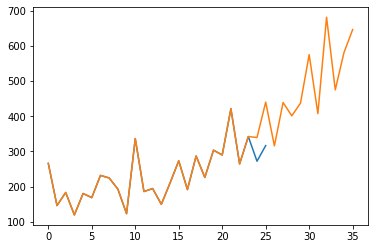

In [52]:
plt.plot(predito.cumprod())
plt.plot(raw_data['Sales'])

In [149]:
previsao_1 = model.predict(logdiff_sales[-5:].values.reshape(1,5,1))[0]

In [150]:
previsao_2 = model.predict(np.array(list(logdiff_sales[-3:].values) + list(previsao_1)).reshape(1,5,1))[0]

In [151]:
previsao_3 = model.predict(np.array( list(logdiff_sales[-1:].values) +  list(previsao_1) +  list(previsao_2)).reshape(1,5,1))[0]

In [152]:
previsao_4 = model.predict(np.array(  [list(previsao_1)[1]] +  list(previsao_2) + list(previsao_3)  ).reshape(1,5,1))[0]

In [153]:
previsao_5 = model.predict(np.array(  [list(previsao_2)[1]] +  list(previsao_3) + list(previsao_4) ).reshape(1,5,1))[0]

In [154]:
previsao_6 = model.predict(np.array(  [list(previsao_3)[1]] +  list(previsao_4) + list(previsao_5) ).reshape(1,5,1))[0]

In [155]:
serie_prevista = list(logdiff_sales) + list(previsao_1) + list(previsao_2) + list(previsao_3) + list(previsao_4) + list(previsao_5) + list(previsao_6)

In [156]:
serie_prevista_exp = np.exp(np.array(serie_prevista))

In [157]:
serie_prevista_exp[0] = initial_value

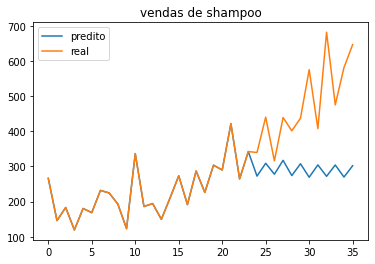

In [158]:
plt.plot(serie_prevista_exp.cumprod(), label='predito')
plt.plot(raw_data['Sales'], label='real')
plt.title("vendas de shampoo")
plt.legend()